In [3]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
df=pd.read_csv(r'C:\Users\Nikhil\Downloads\archive\20_Victims_of_rape.csv')

In [5]:
df

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [6]:
df.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [8]:
df.Area_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [9]:
df.Subgroup.unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

In [10]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col

['Area_Name', 'Subgroup']

In [11]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Area_Name
Kerala                       30
Sikkim                       30
Arunachal Pradesh            30
Tripura                      30
Himachal Pradesh             30
Jharkhand                    30
Karnataka                    30
Jammu & Kashmir              30
West Bengal                  30
Chhattisgarh                 30
Maharashtra                  30
Bihar                        30
Manipur                      30
Daman & Diu                  30
Nagaland                     30
Uttar Pradesh                30
Mizoram                      30
Gujarat                      30
Punjab                       30
Delhi                        30
Andaman & Nicobar Islands    30
Rajasthan                    30
Meghalaya                    30
Andhra Pradesh               30
Uttarakhand                  30
Chandigarh                   30
Goa                          30
Dadra & Nagar Haveli         30
Lakshadweep                  30
Haryana                      30
Madhya Pradesh               3

In [12]:
import seaborn as sns


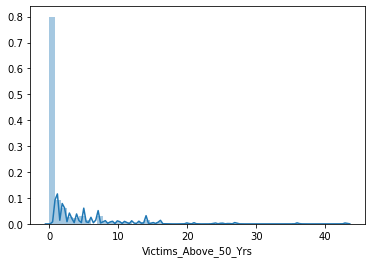

In [13]:
sns.distplot(df['Victims_Above_50_Yrs'])

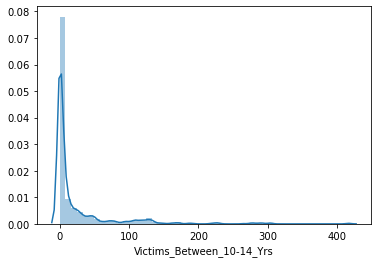

In [14]:
sns.distplot(df['Victims_Between_10-14_Yrs'])

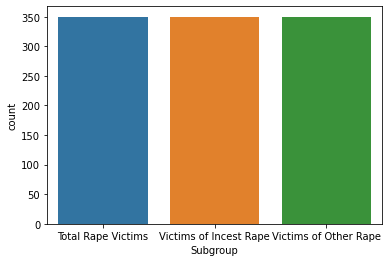

In [15]:
sns.countplot(df['Subgroup'])

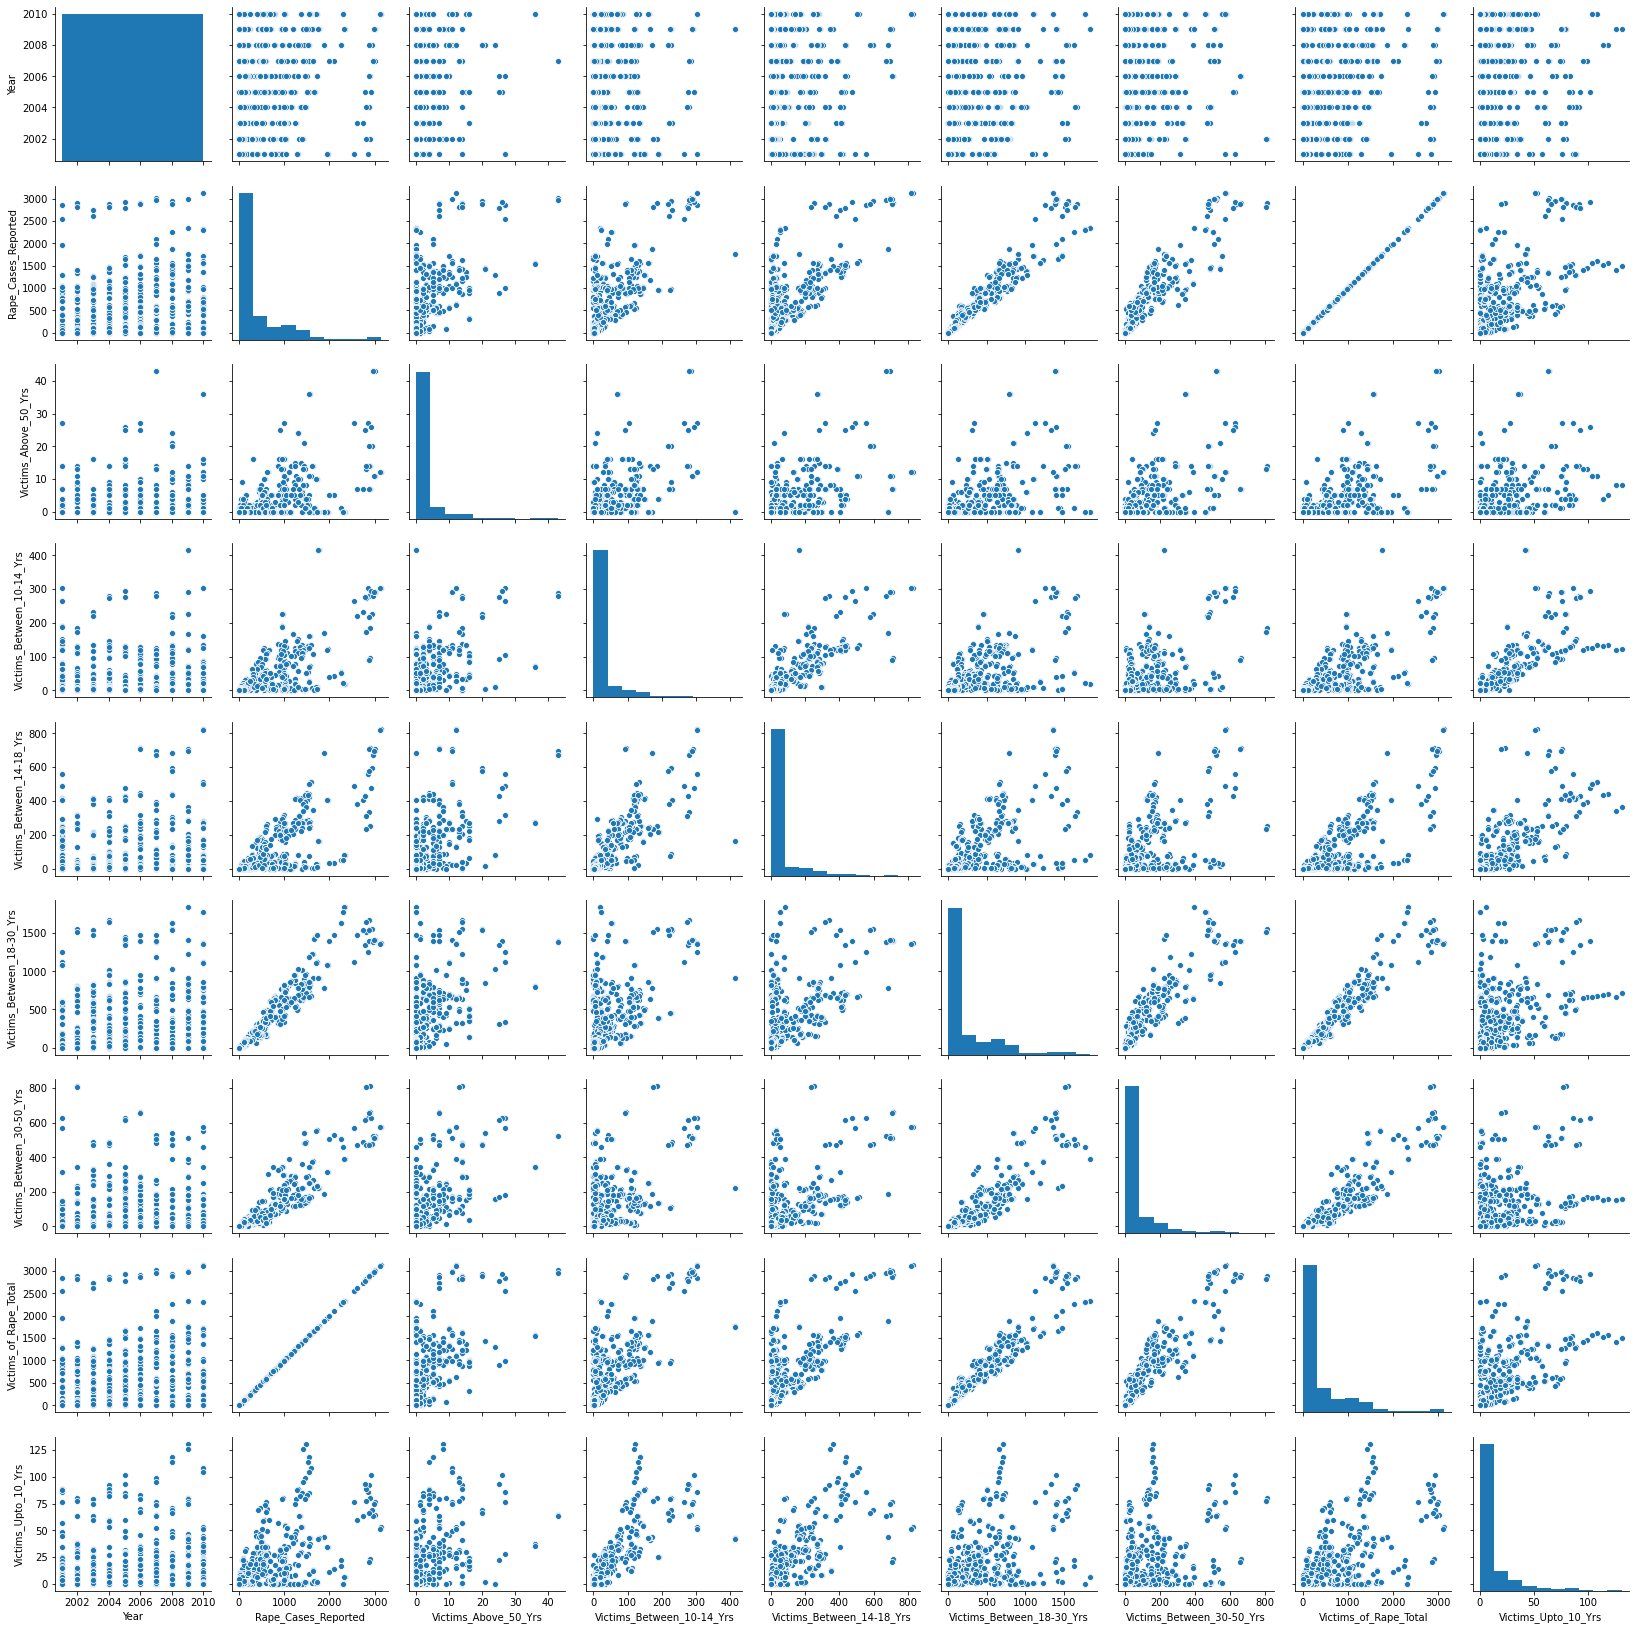

In [16]:
sns.pairplot(df)

In [17]:
df.skew()

Year                         0.000000
Rape_Cases_Reported          2.228595
Victims_Above_50_Yrs         4.151161
Victims_Between_10-14_Yrs    3.554447
Victims_Between_14-18_Yrs    3.327417
Victims_Between_18-30_Yrs    2.089371
Victims_Between_30-50_Yrs    2.905033
Victims_of_Rape_Total        2.226962
Victims_Upto_10_Yrs          2.845238
dtype: float64

In [18]:
df.corr()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
Year,1.000000,0.070944,0.095368,0.057081,0.060579,0.069109,0.053460,0.071121,0.066608
Rape_Cases_Reported,0.070944,1.000000,0.652470,0.762842,0.780262,0.966432,0.925609,0.999998,0.665398
Victims_Above_50_Yrs,0.095368,0.652470,1.000000,0.595057,0.588920,0.566389,0.638712,0.652482,0.514891
Victims_Between_10-14_Yrs,0.057081,0.762842,0.595057,1.000000,0.834968,0.615116,0.599692,0.763069,0.827184
Victims_Between_14-18_Yrs,0.060579,0.780262,0.588920,0.834968,1.000000,0.615138,0.605228,0.780669,0.783994
Victims_Between_18-30_Yrs,0.069109,0.966432,0.566389,0.615116,0.615138,1.000000,0.907376,0.966303,0.529155
Victims_Between_30-50_Yrs,0.053460,0.925609,0.638712,0.599692,0.605228,0.907376,1.000000,0.925359,0.467843
Victims_of_Rape_Total,0.071121,0.999998,0.652482,0.763069,0.780669,0.966303,0.925359,1.000000,0.666310
Victims_Upto_10_Yrs,0.066608,0.665398,0.514891,0.827184,0.783994,0.529155,0.467843,0.666310,1.000000


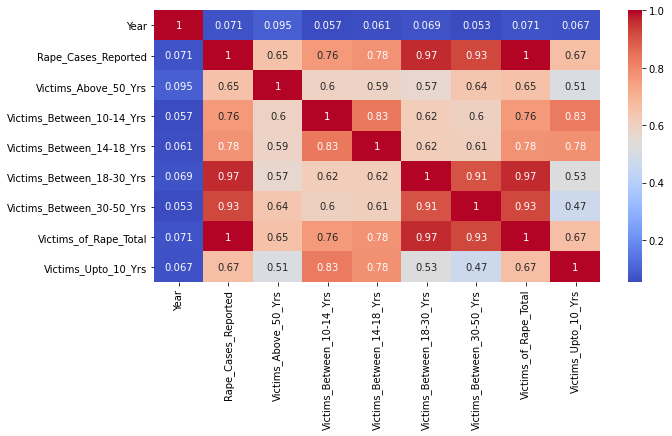

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Victims above 50 yrs has a weak correlation

# Label encoding

In [20]:
df.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [21]:
le=LabelEncoder()

list1=['Area_Name','Year','Subgroup']   #for labeling multiple columns
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [22]:
df

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,0,0,0,3,0,0,3,0,0,3,0
1,0,0,1,1,0,0,1,0,0,1,0
2,0,0,2,2,0,0,2,0,0,2,0
3,0,1,0,2,0,0,1,1,0,2,0
4,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,34,8,1,3,0,0,1,1,1,3,0
1046,34,8,2,2333,0,18,84,1834,391,2333,6
1047,34,9,0,2311,0,22,51,1779,459,2311,0
1048,34,9,1,4,0,1,0,2,1,4,0


In [23]:
x=df.drop('Victims_of_Rape_Total',axis=1)
y=df['Victims_of_Rape_Total']

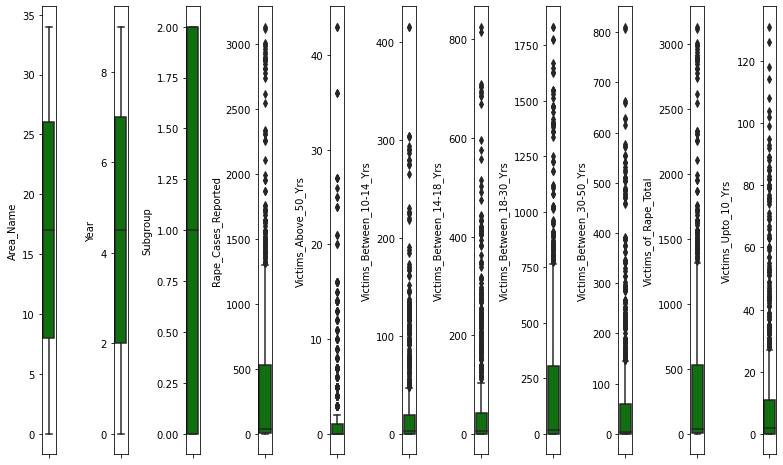

In [24]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [25]:
df.skew()

Area_Name                    0.000000
Year                         0.000000
Subgroup                     0.000000
Rape_Cases_Reported          2.228595
Victims_Above_50_Yrs         4.151161
Victims_Between_10-14_Yrs    3.554447
Victims_Between_14-18_Yrs    3.327417
Victims_Between_18-30_Yrs    2.089371
Victims_Between_30-50_Yrs    2.905033
Victims_of_Rape_Total        2.226962
Victims_Upto_10_Yrs          2.845238
dtype: float64

In [26]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.959162  , -1.72115628, -1.26755013, ..., -1.31609923,
        -1.10316561, -1.08909765],
       [-1.959162  , -1.72115628,  0.09064754, ..., -1.31609923,
        -1.10316561, -1.08909765],
       [-1.959162  , -1.72115628,  1.17690258, ..., -1.31609923,
        -1.10316561, -1.08909765],
       ...,
       [ 1.53423234,  1.45592206, -1.26755013, ...,  1.63075732,
         1.59047431, -1.08909765],
       [ 1.53423234,  1.45592206,  0.09064754, ..., -0.83824194,
        -0.64483738, -1.08909765],
       [ 1.53423234,  1.45592206,  1.17690258, ...,  1.63036543,
         1.58992327, -1.08909765]])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [29]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs well")
        print("At random state:-",i)
        print("Training r2 score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is:-", r2_score(y_test,pred_test)*100)
        

At random state 0 the model performs well
At random state:- 0
Training r2 score is:- 61.56353489236616
Testing r2 score is:- 61.56363963933411
At random state 53 the model performs well
At random state:- 53
Training r2 score is:- 61.62351427186499
Testing r2 score is:- 61.60940494103948
At random state 202 the model performs well
At random state:- 202
Training r2 score is:- 61.546855373250466
Testing r2 score is:- 61.490839247370175
At random state 214 the model performs well
At random state:- 214
Training r2 score is:- 61.52044853014923
Testing r2 score is:- 61.5241859277328
At random state 227 the model performs well
At random state:- 227
Training r2 score is:- 61.533092048798444
Testing r2 score is:- 61.47724366333345
At random state 314 the model performs well
At random state:- 314
Training r2 score is:- 61.574743519085054
Testing r2 score is:- 61.56202359191922
At random state 338 the model performs well
At random state:- 338
Training r2 score is:- 61.57044548076086
Testing r2 sco

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred = model.predict(x)
    
    #perform cross-validation
    cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('model report')
    print('MSE:', mean_squared_error(y, pred))
    print('CV score:', cv_score)

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE: 134385.0970095197
CV score: 166761.97200892982


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=877)

# Finding the best model

In [33]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()

In [34]:
print(r2score*100)

99.9989828445076


In [36]:
import joblib
joblib.dump(RF,"Project20.pkl")

['Project20.pkl']